In [35]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
import warnings
rcParams['figure.figsize'] = (16, 8)#그림 사이즈 지정
plt.style.use('fivethirtyeight')#그림 기본 스타일
pd.set_option('max_columns', 100)#칼럼 100개 허용
pd.set_option("display.precision", 4)#소수점 4자리허용
warnings.simplefilter('ignore')#경고분 무시
#데이터 경로
data_dir = Path('C:\\Users\\USER\\Desktop\\경진대회_dataset\\DataInput')
trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
feature_file = data_dir / 'feature.csv'
seed = 150#랜덤 지정 수 결정해줌 나중에 1000 2000 3000 test 시간나면..


In [36]:
# EDA
# 학습데이터 로드
trn = pd.read_csv(trn_file,header=None)#새로운 인덱스 컬럼 추가없이+0번 칼럼을 인덱스로 사용하겠다
print(trn.shape)#(4279, 32) 첫 컬럼=종속
trn.head()#위에서 5줄 출력

(4280, 32)


0    1    2    3    4    5    6   7    8    9   10  11   12  13  14   15  \
0  HI  188  128   95  114  143  108  88  103  113  85  88  113  87  88  103   
1  PH  174  112   88  104  119   92  74   79   88  74  67   90  68  71   73   
2  GR  175  138  106  105  135  109  75   95  113  96  74  112  96  70   87   
3  PH  176  111   80  106  131   96  76   99  104  85  75   89  75  79   91   
4  EL  182  144  111  100  151  119  67  106  114  90  76  115  94  68  106   

    16  17   18   19  20  21   22  23  24   25   26  27  28   29   30  31  
0   87  84   99  104  82  96  100  78  70   79   84  66  70   75   76  63  
1   68  71   77   90  67  71   82  65  70   75   89  73  67   71   89  73  
2  100  66   83  117  67  88  110  98  67   88  119  98  75   91  110  94  
3   75  84  103  109  82  91   96  78  78   91   96  78  82  104  112  85  
4   91  68  102  115  71  95  108  88  71  103  113  92  68  107  118  92

In [37]:
trn.dtypes

0     object
1      int64
2      int64
3      int64
4      int64
5      int64
6      int64
7      int64
8      int64
9      int64
10     int64
11     int64
12     int64
13     int64
14     int64
15     int64
16     int64
17     int64
18     int64
19     int64
20     int64
21     int64
22     int64
23     int64
24     int64
25     int64
26     int64
27     int64
28     int64
29     int64
30     int64
31     int64
dtype: object

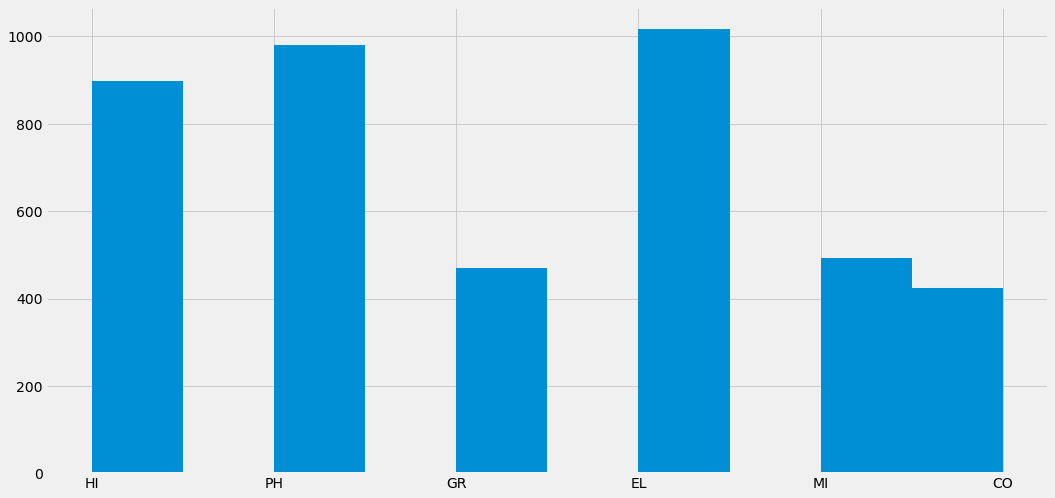

In [38]:
class_종속 = pd.DataFrame(index=range(0,1), columns=['종속'])
class_종속=trn.iloc[:,0]

#trn[].value_counts().sort_index()
# 정렬 함수> sort_index: 인덱스 기준 정렬 sort_values: 값 기준 정렬
class_종속.hist()

In [39]:
class_종속.value_counts()

EL    1017
PH     981
HI     897
MI     492
GR     469
CO     424
Name: 0, dtype: int64

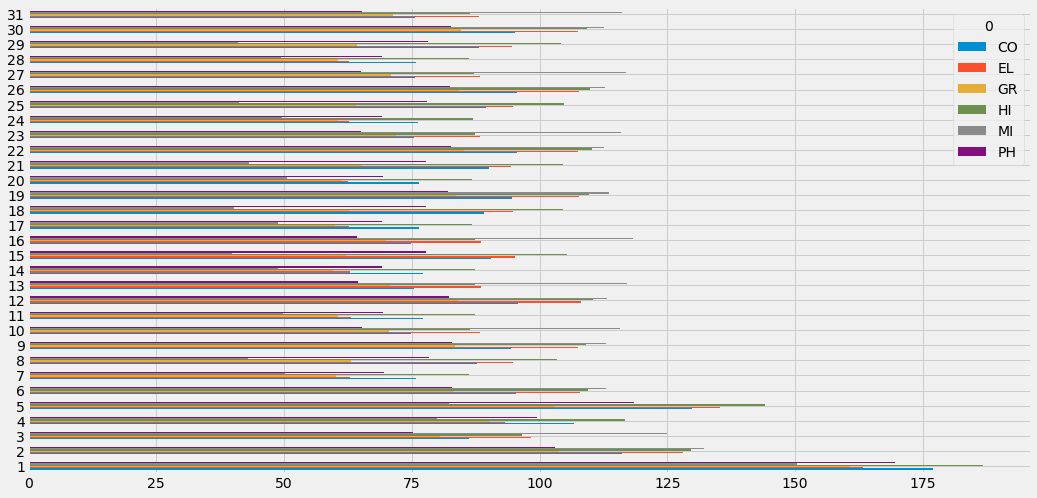

In [40]:
trn.groupby(class_종속).mean().T.plot(kind='barh')

In [48]:
num_cols = [x for x in df.columns if df[x].dtype in [np.int64, np.float64]]
print(num_cols)
#sns.pairplot(data=df, vars=num_cols + [target_col], size=5)
#df.corr().style.background_gradient()
num_cols[:5]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


[1, 2, 3, 4, 5]

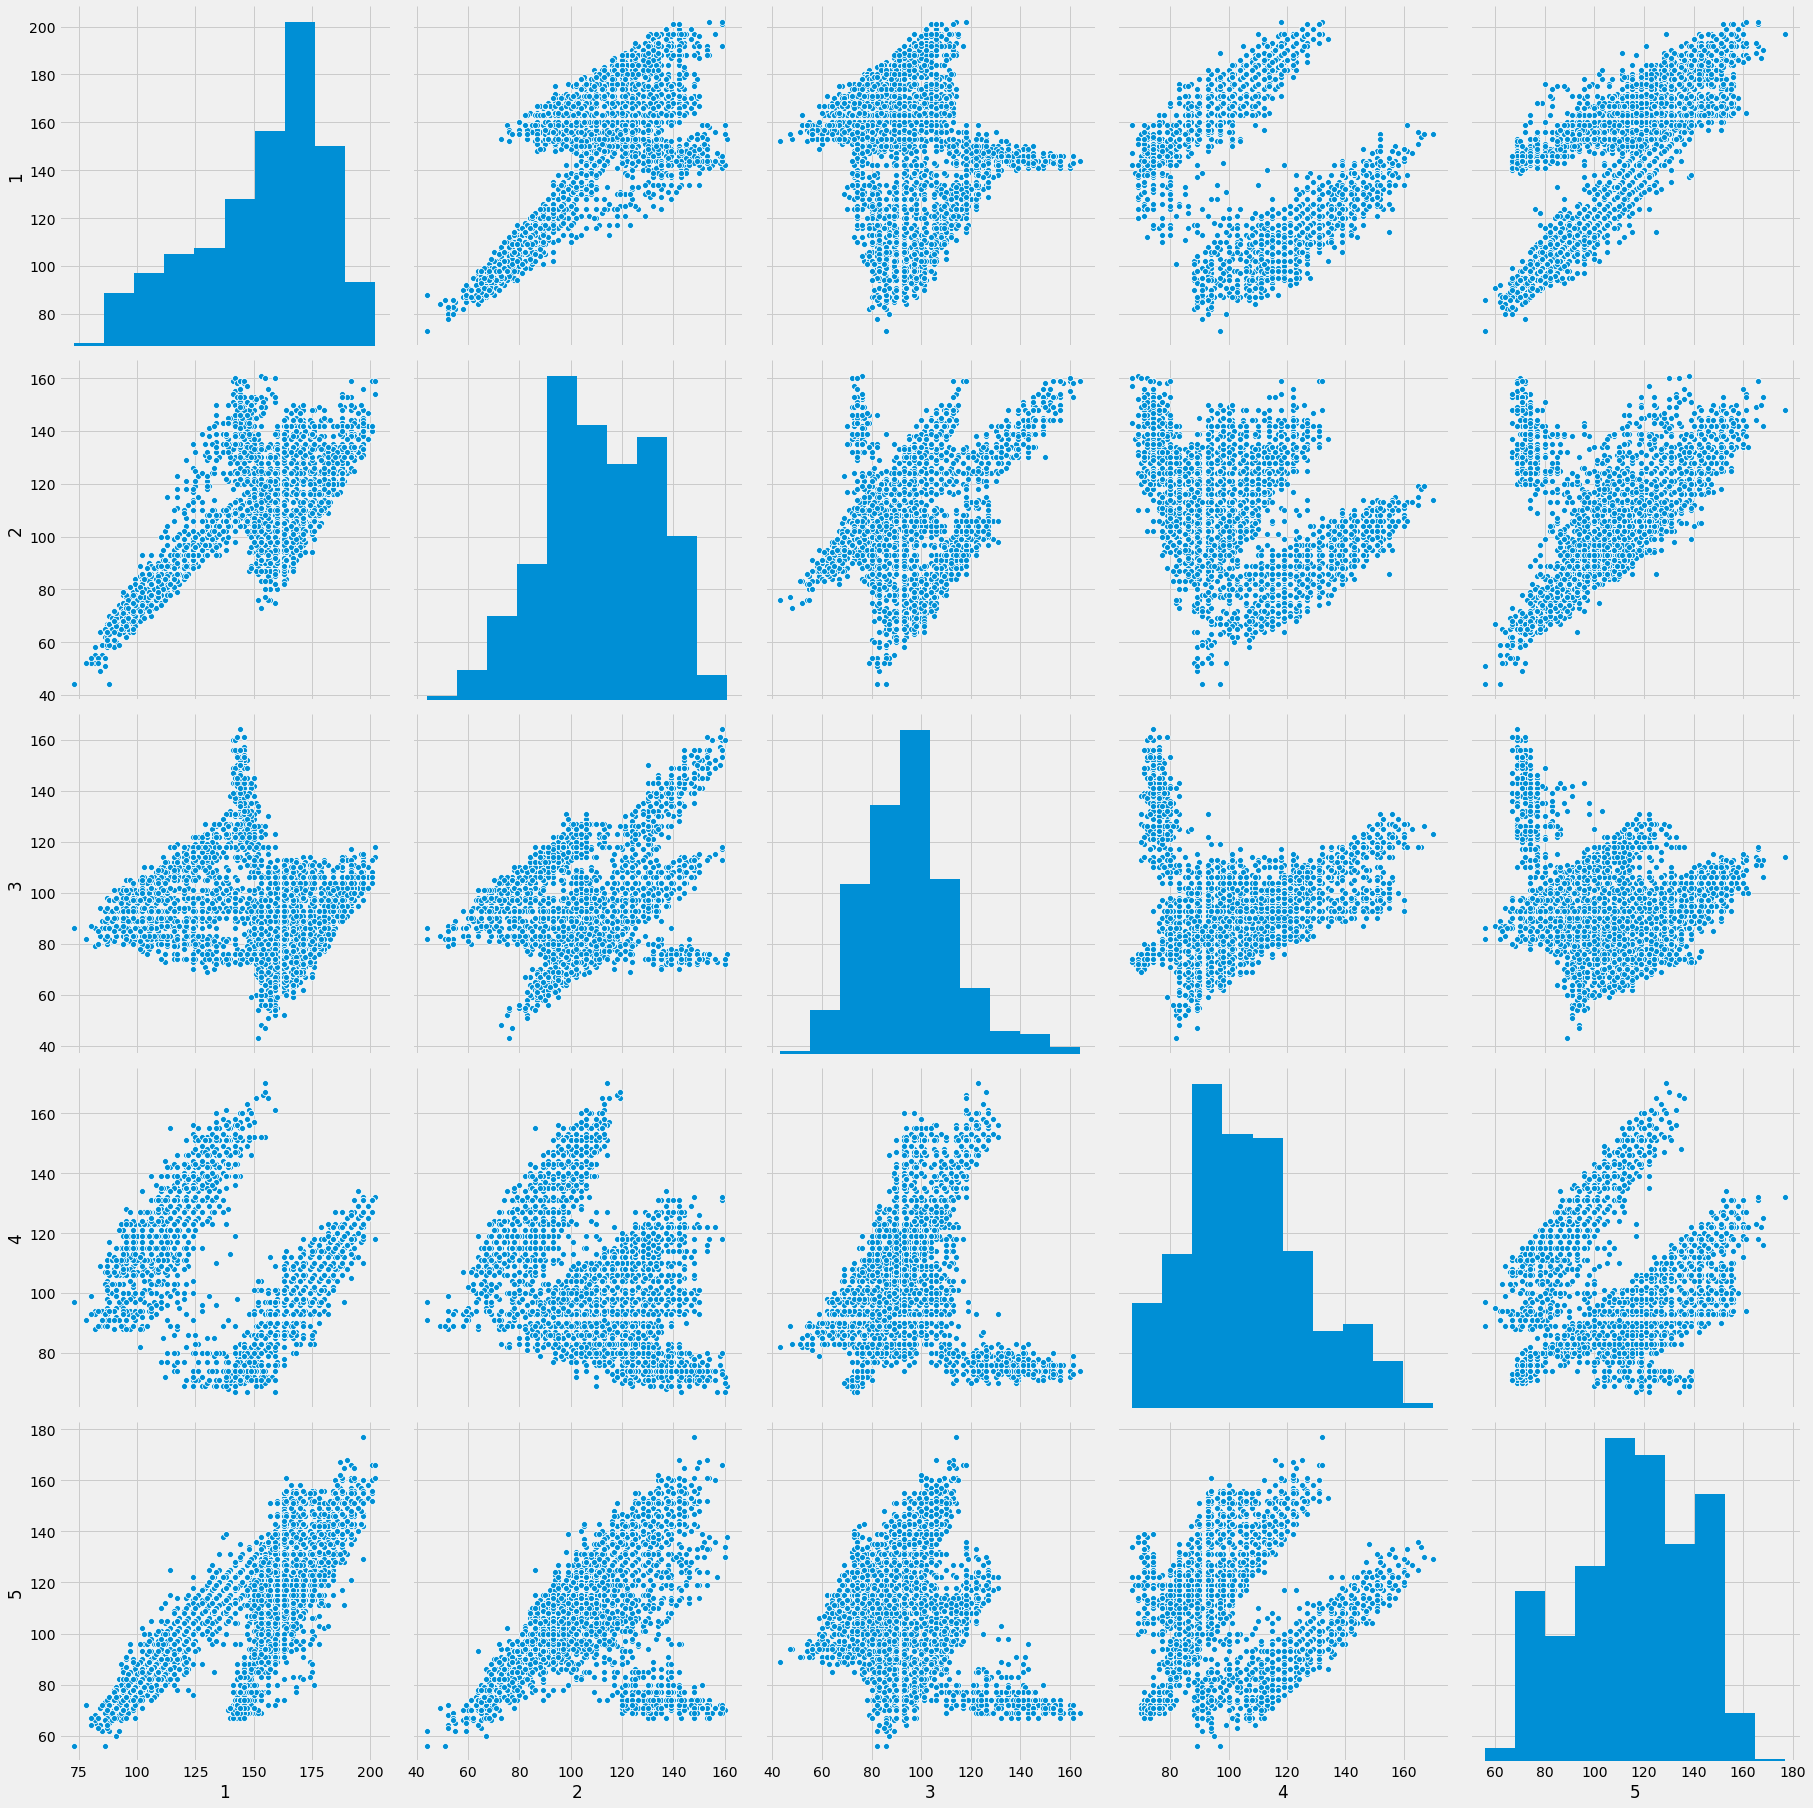

In [49]:
sns.pairplot(data=df, vars=num_cols[:5], size=5)#정규분포


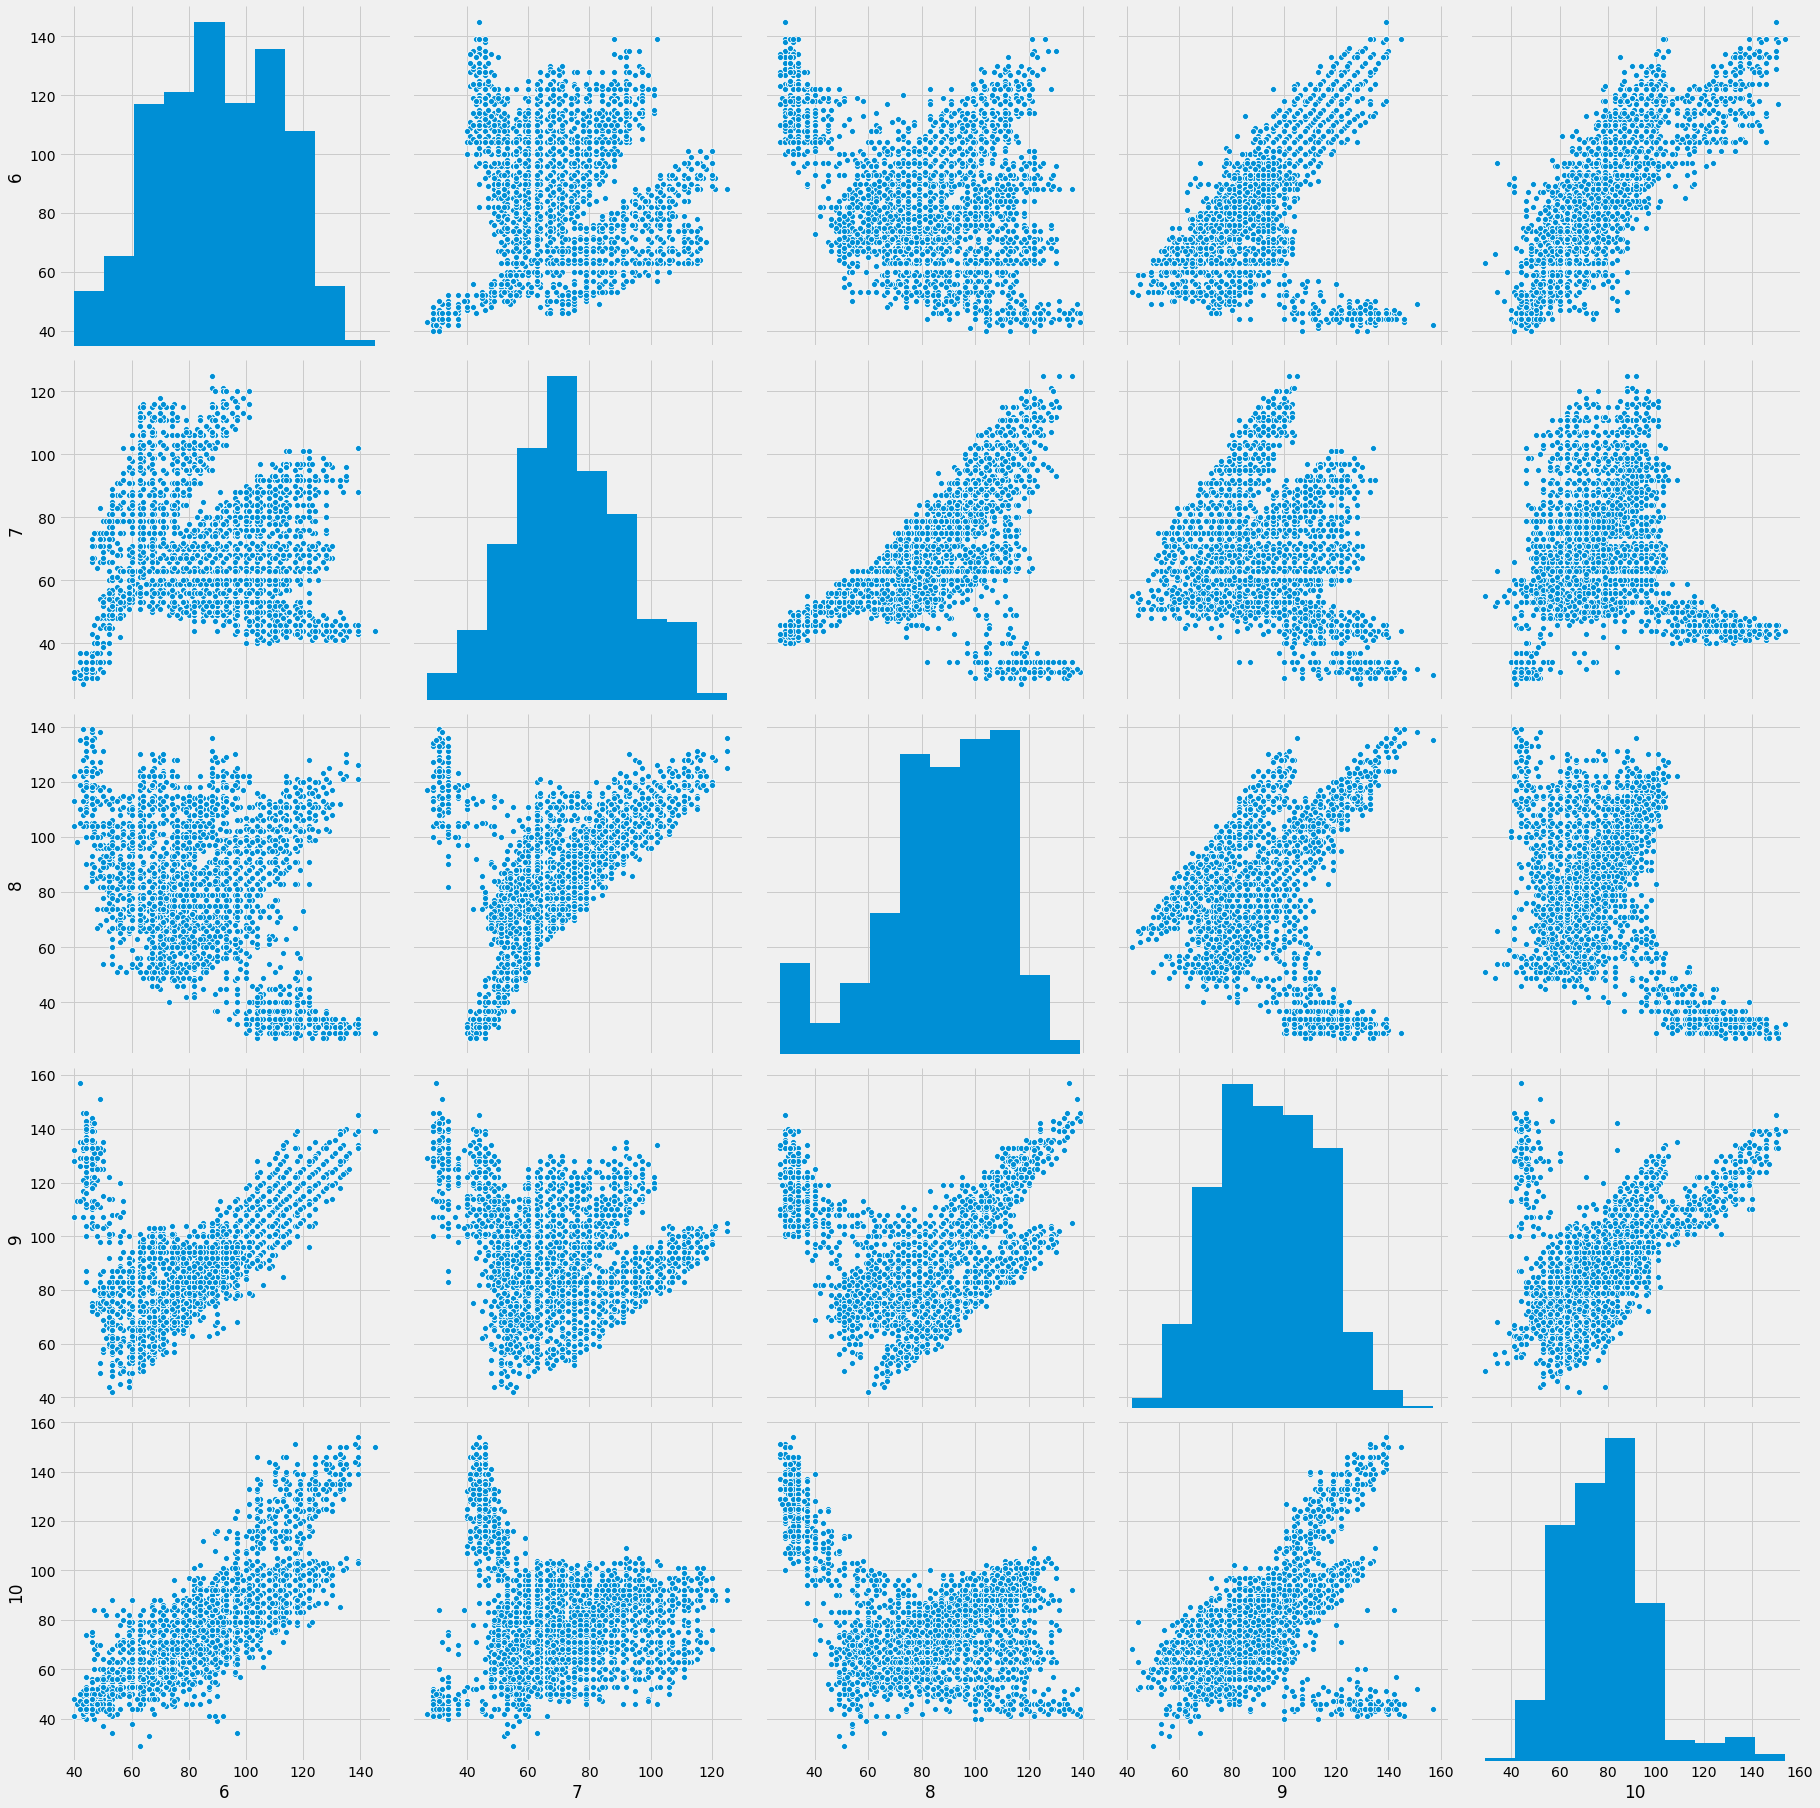

In [50]:
sns.pairplot(data=df, vars=num_cols[5:10], size=5)#정규분포


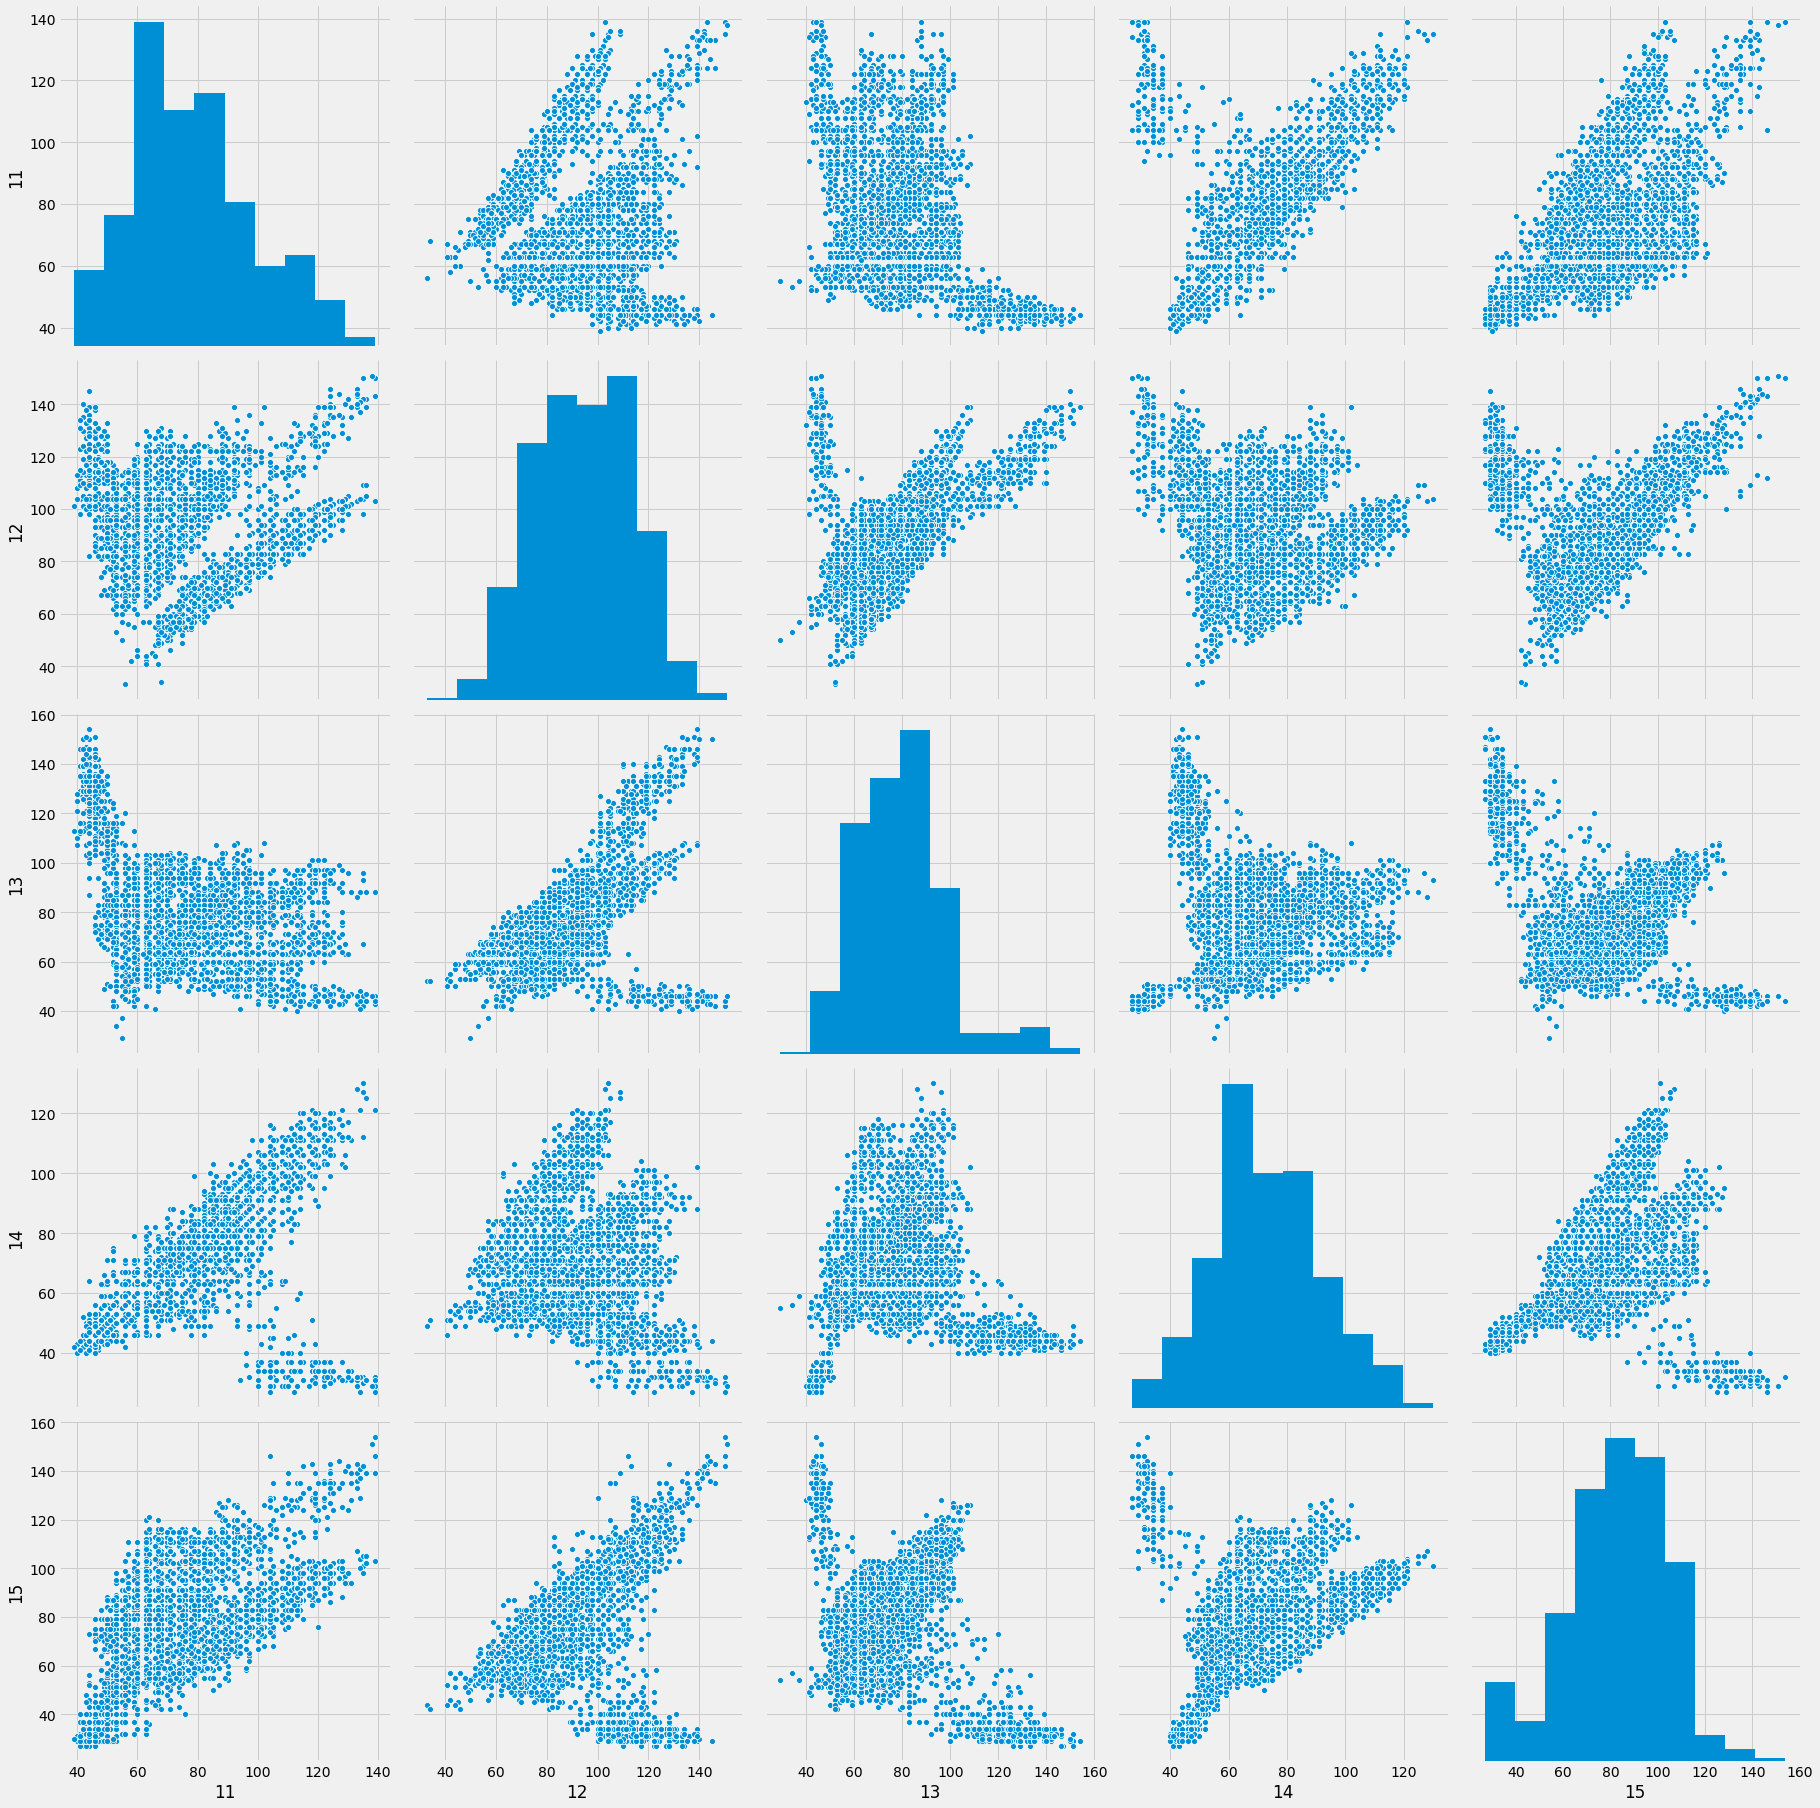

In [54]:
sns.pairplot(data=df, vars=num_cols[10:15], size=5)#정규분포


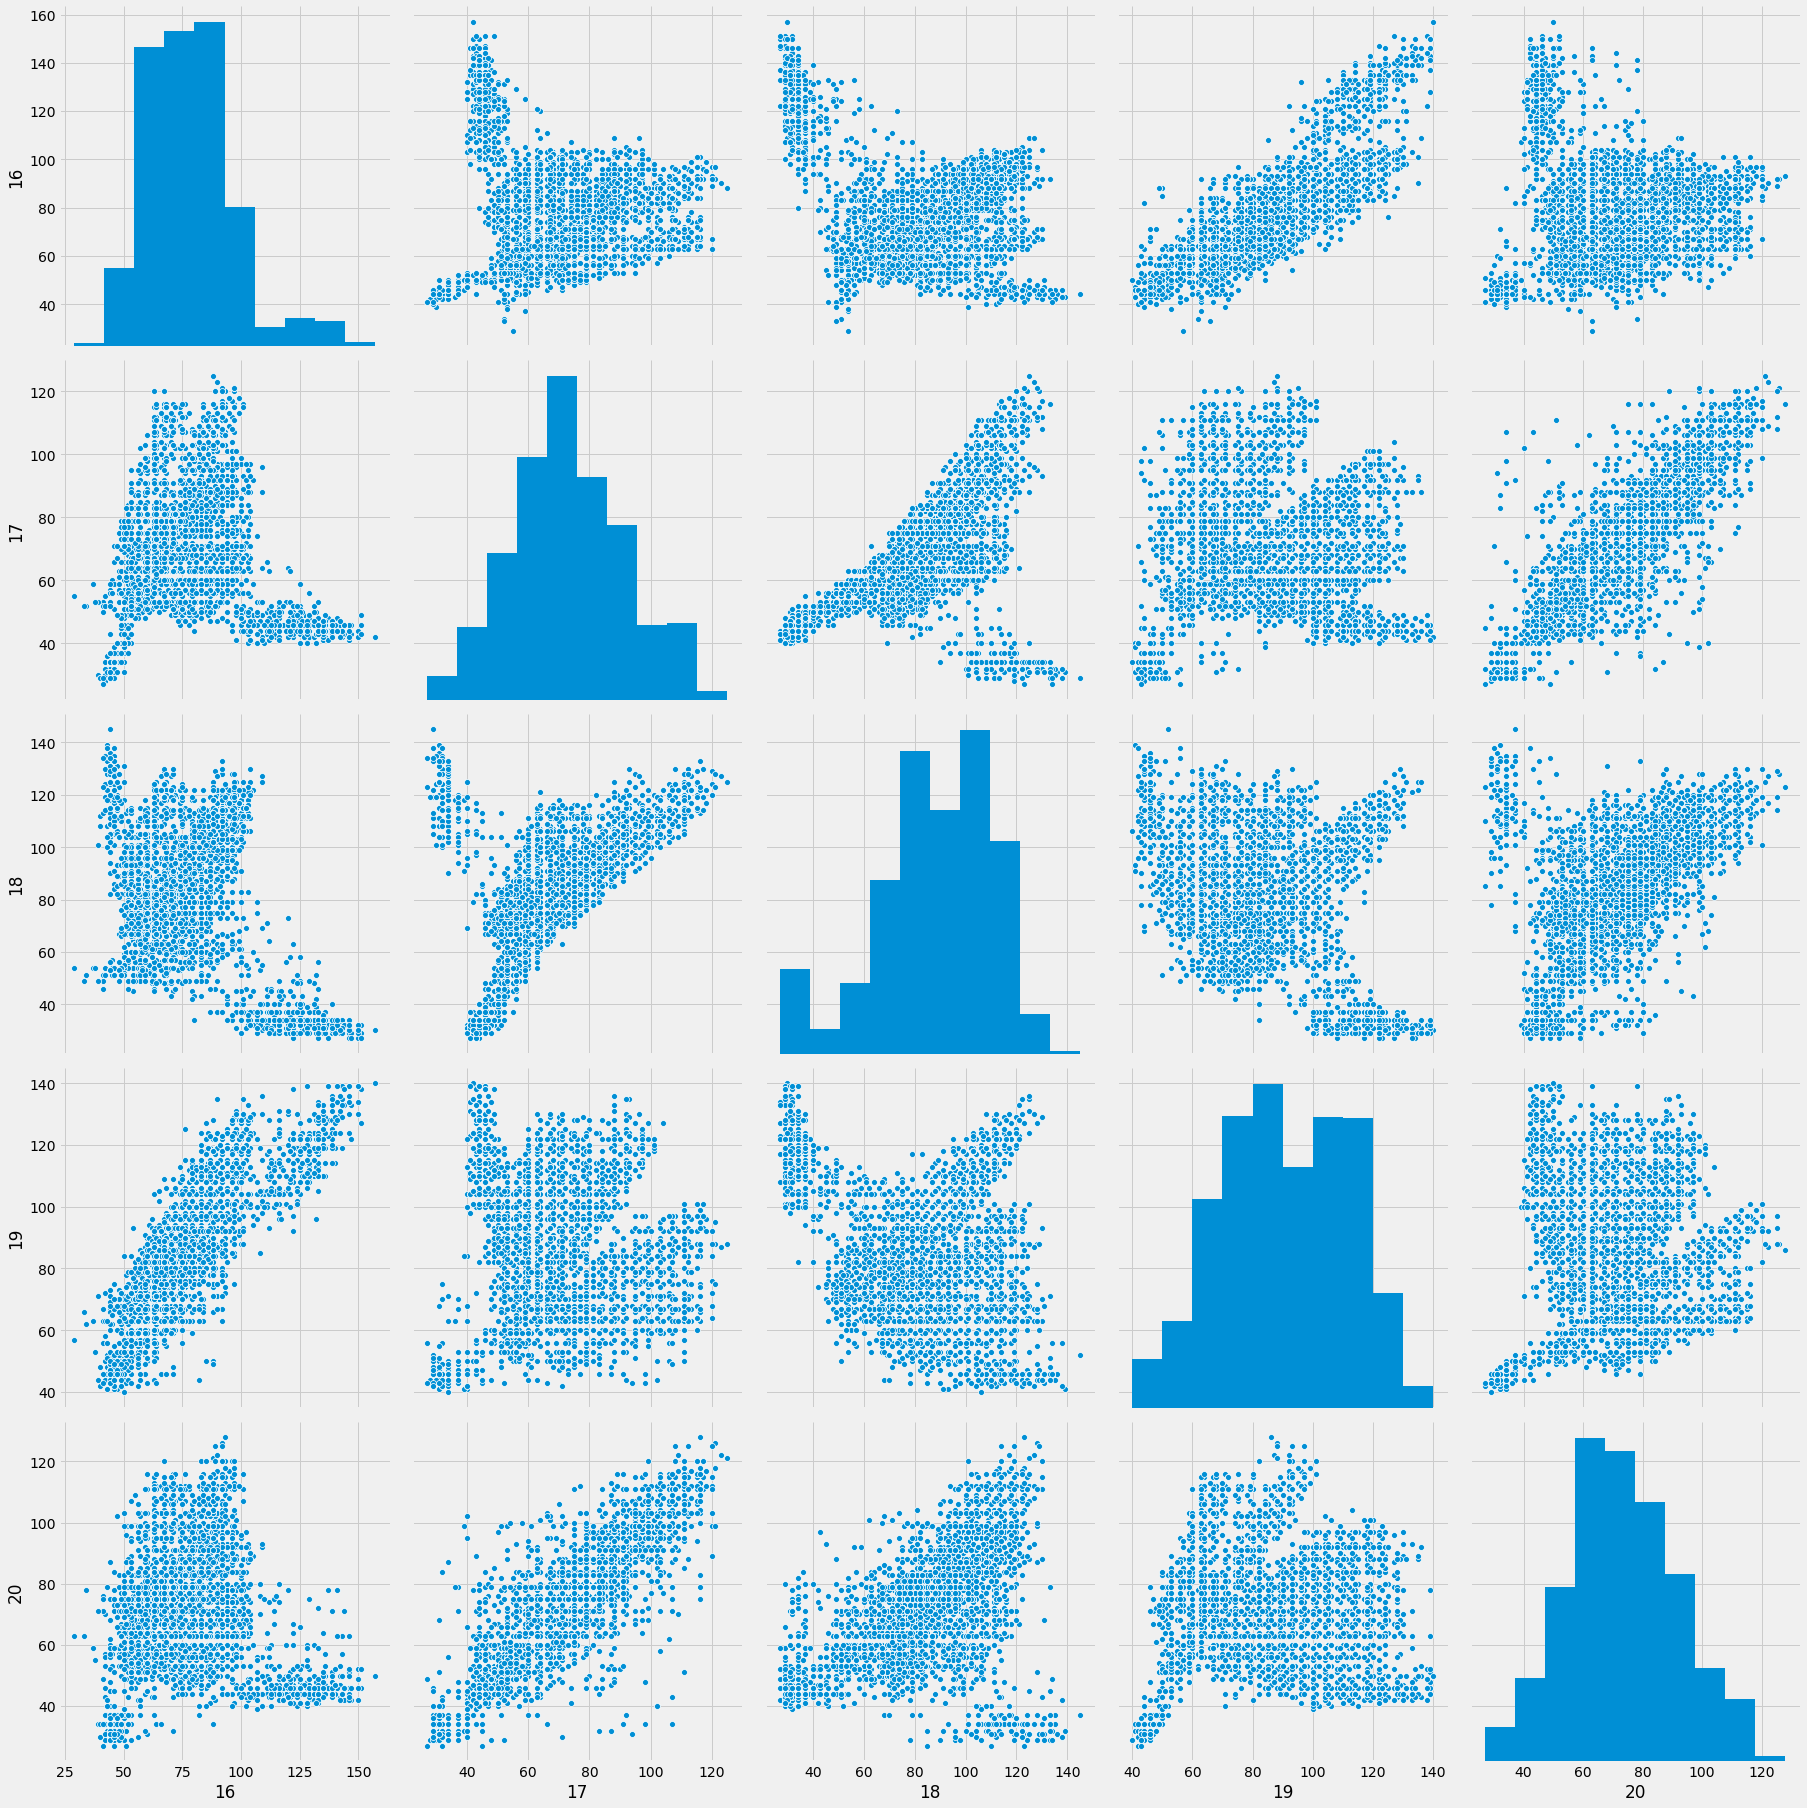

In [53]:
sns.pairplot(data=df, vars=num_cols[15:20], size=5)#정규분포


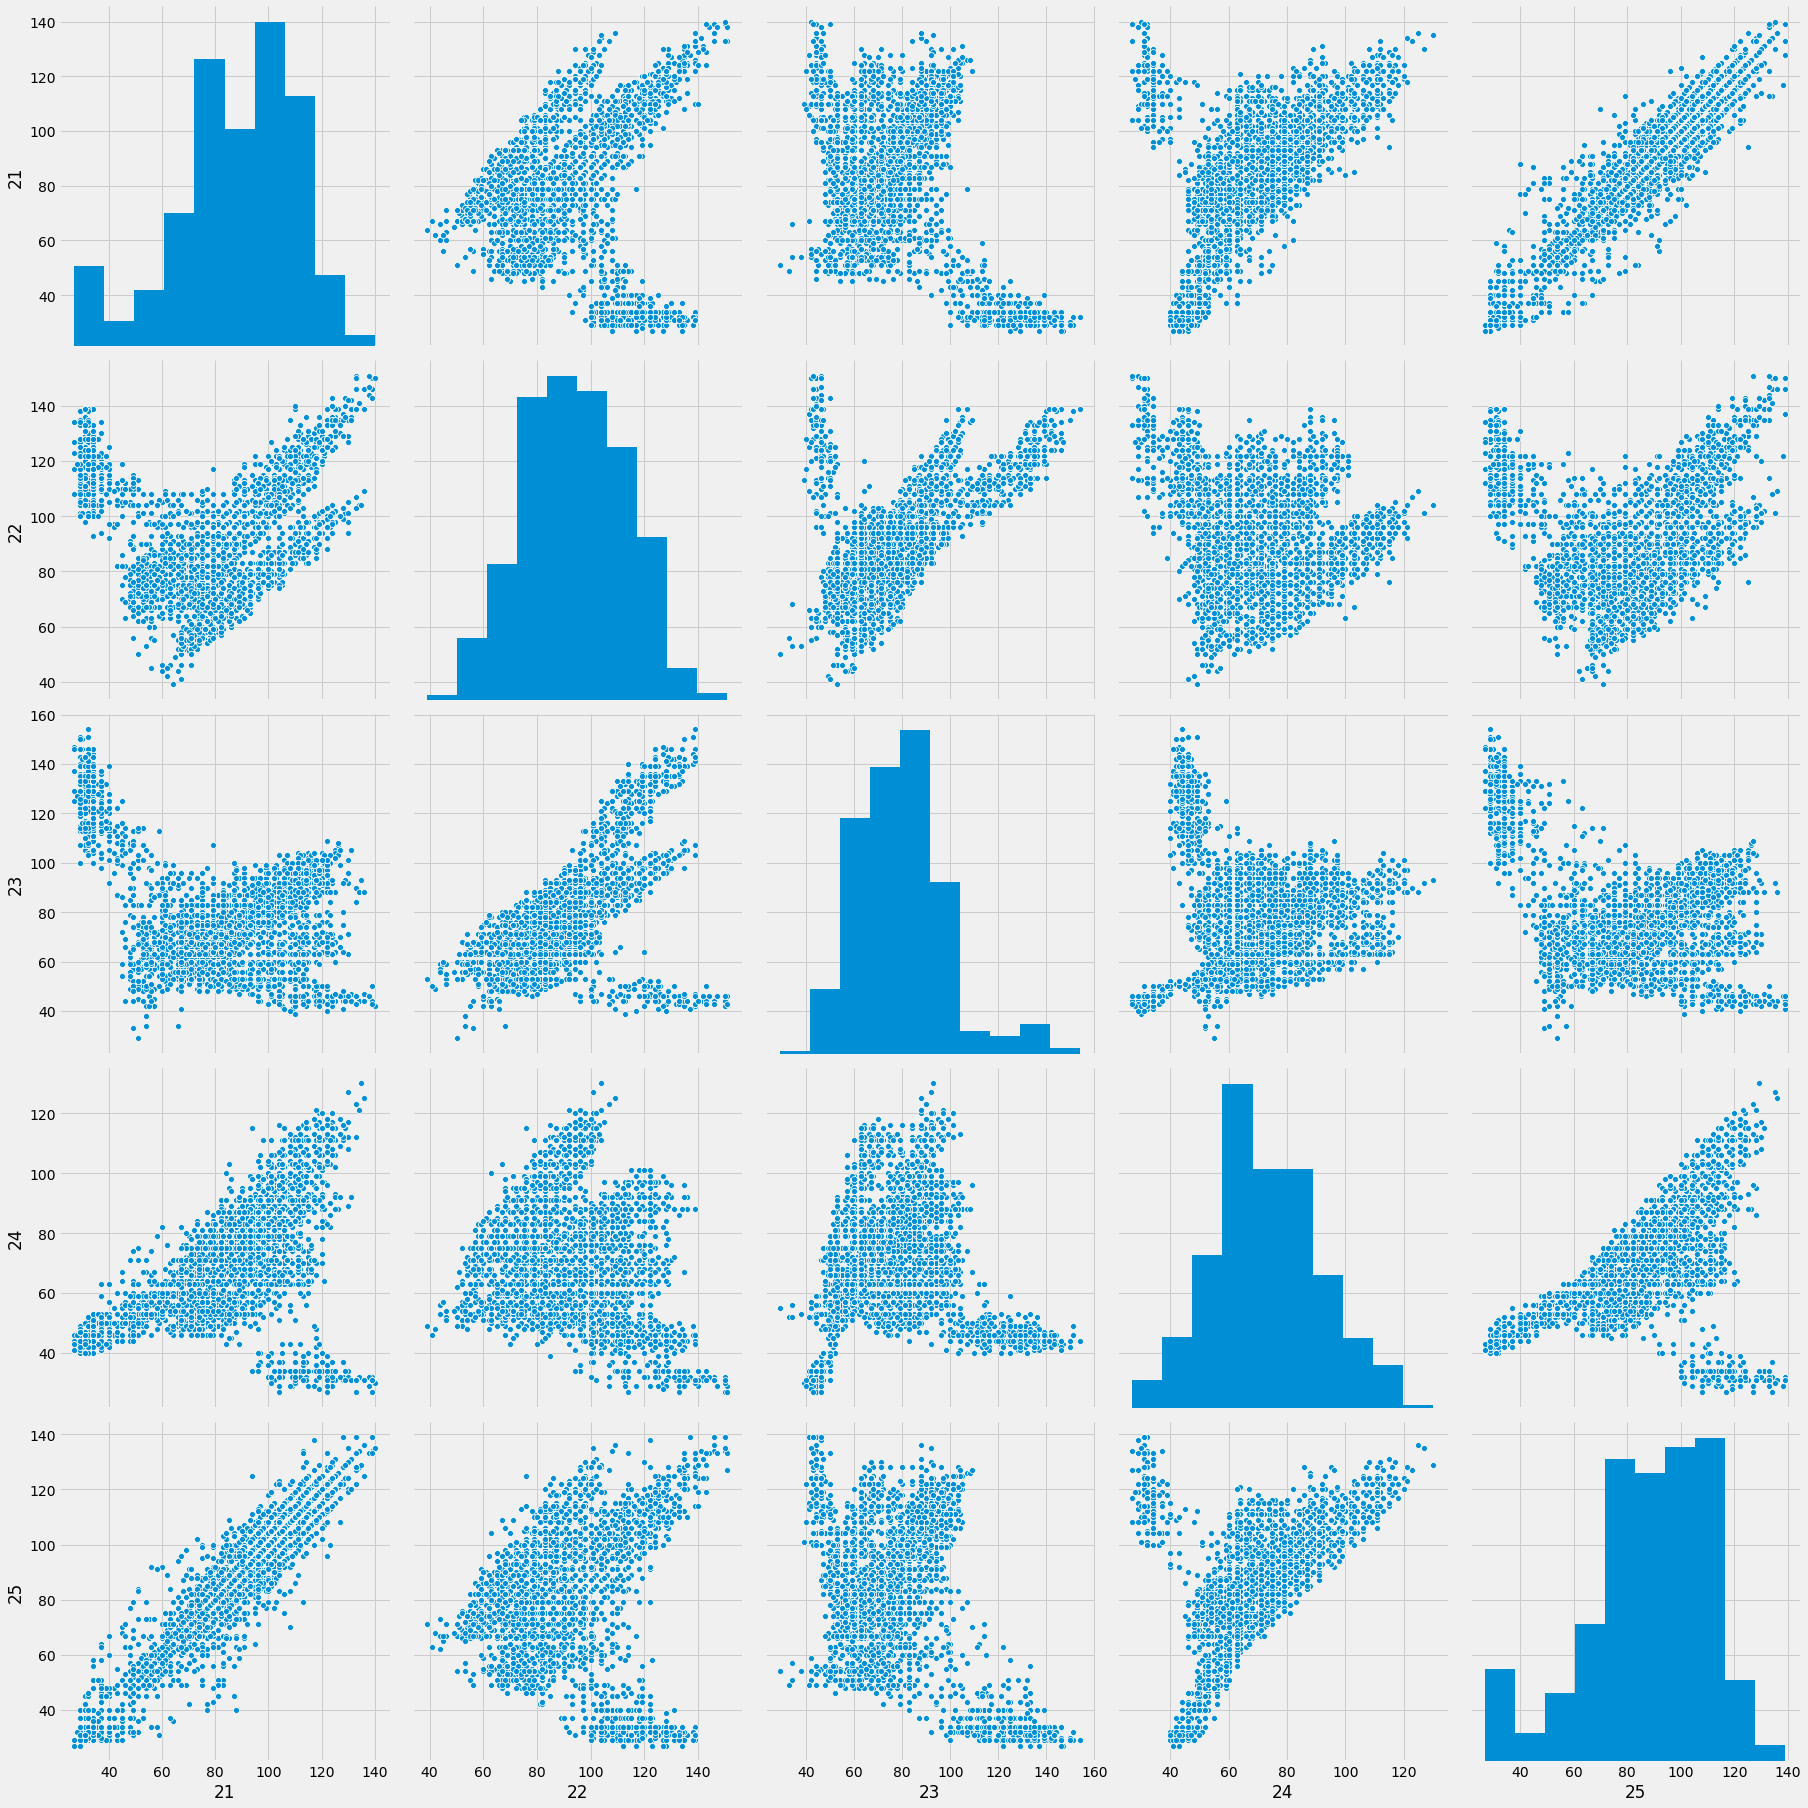

In [52]:
sns.pairplot(data=df, vars=num_cols[20:25], size=5)#정규분포


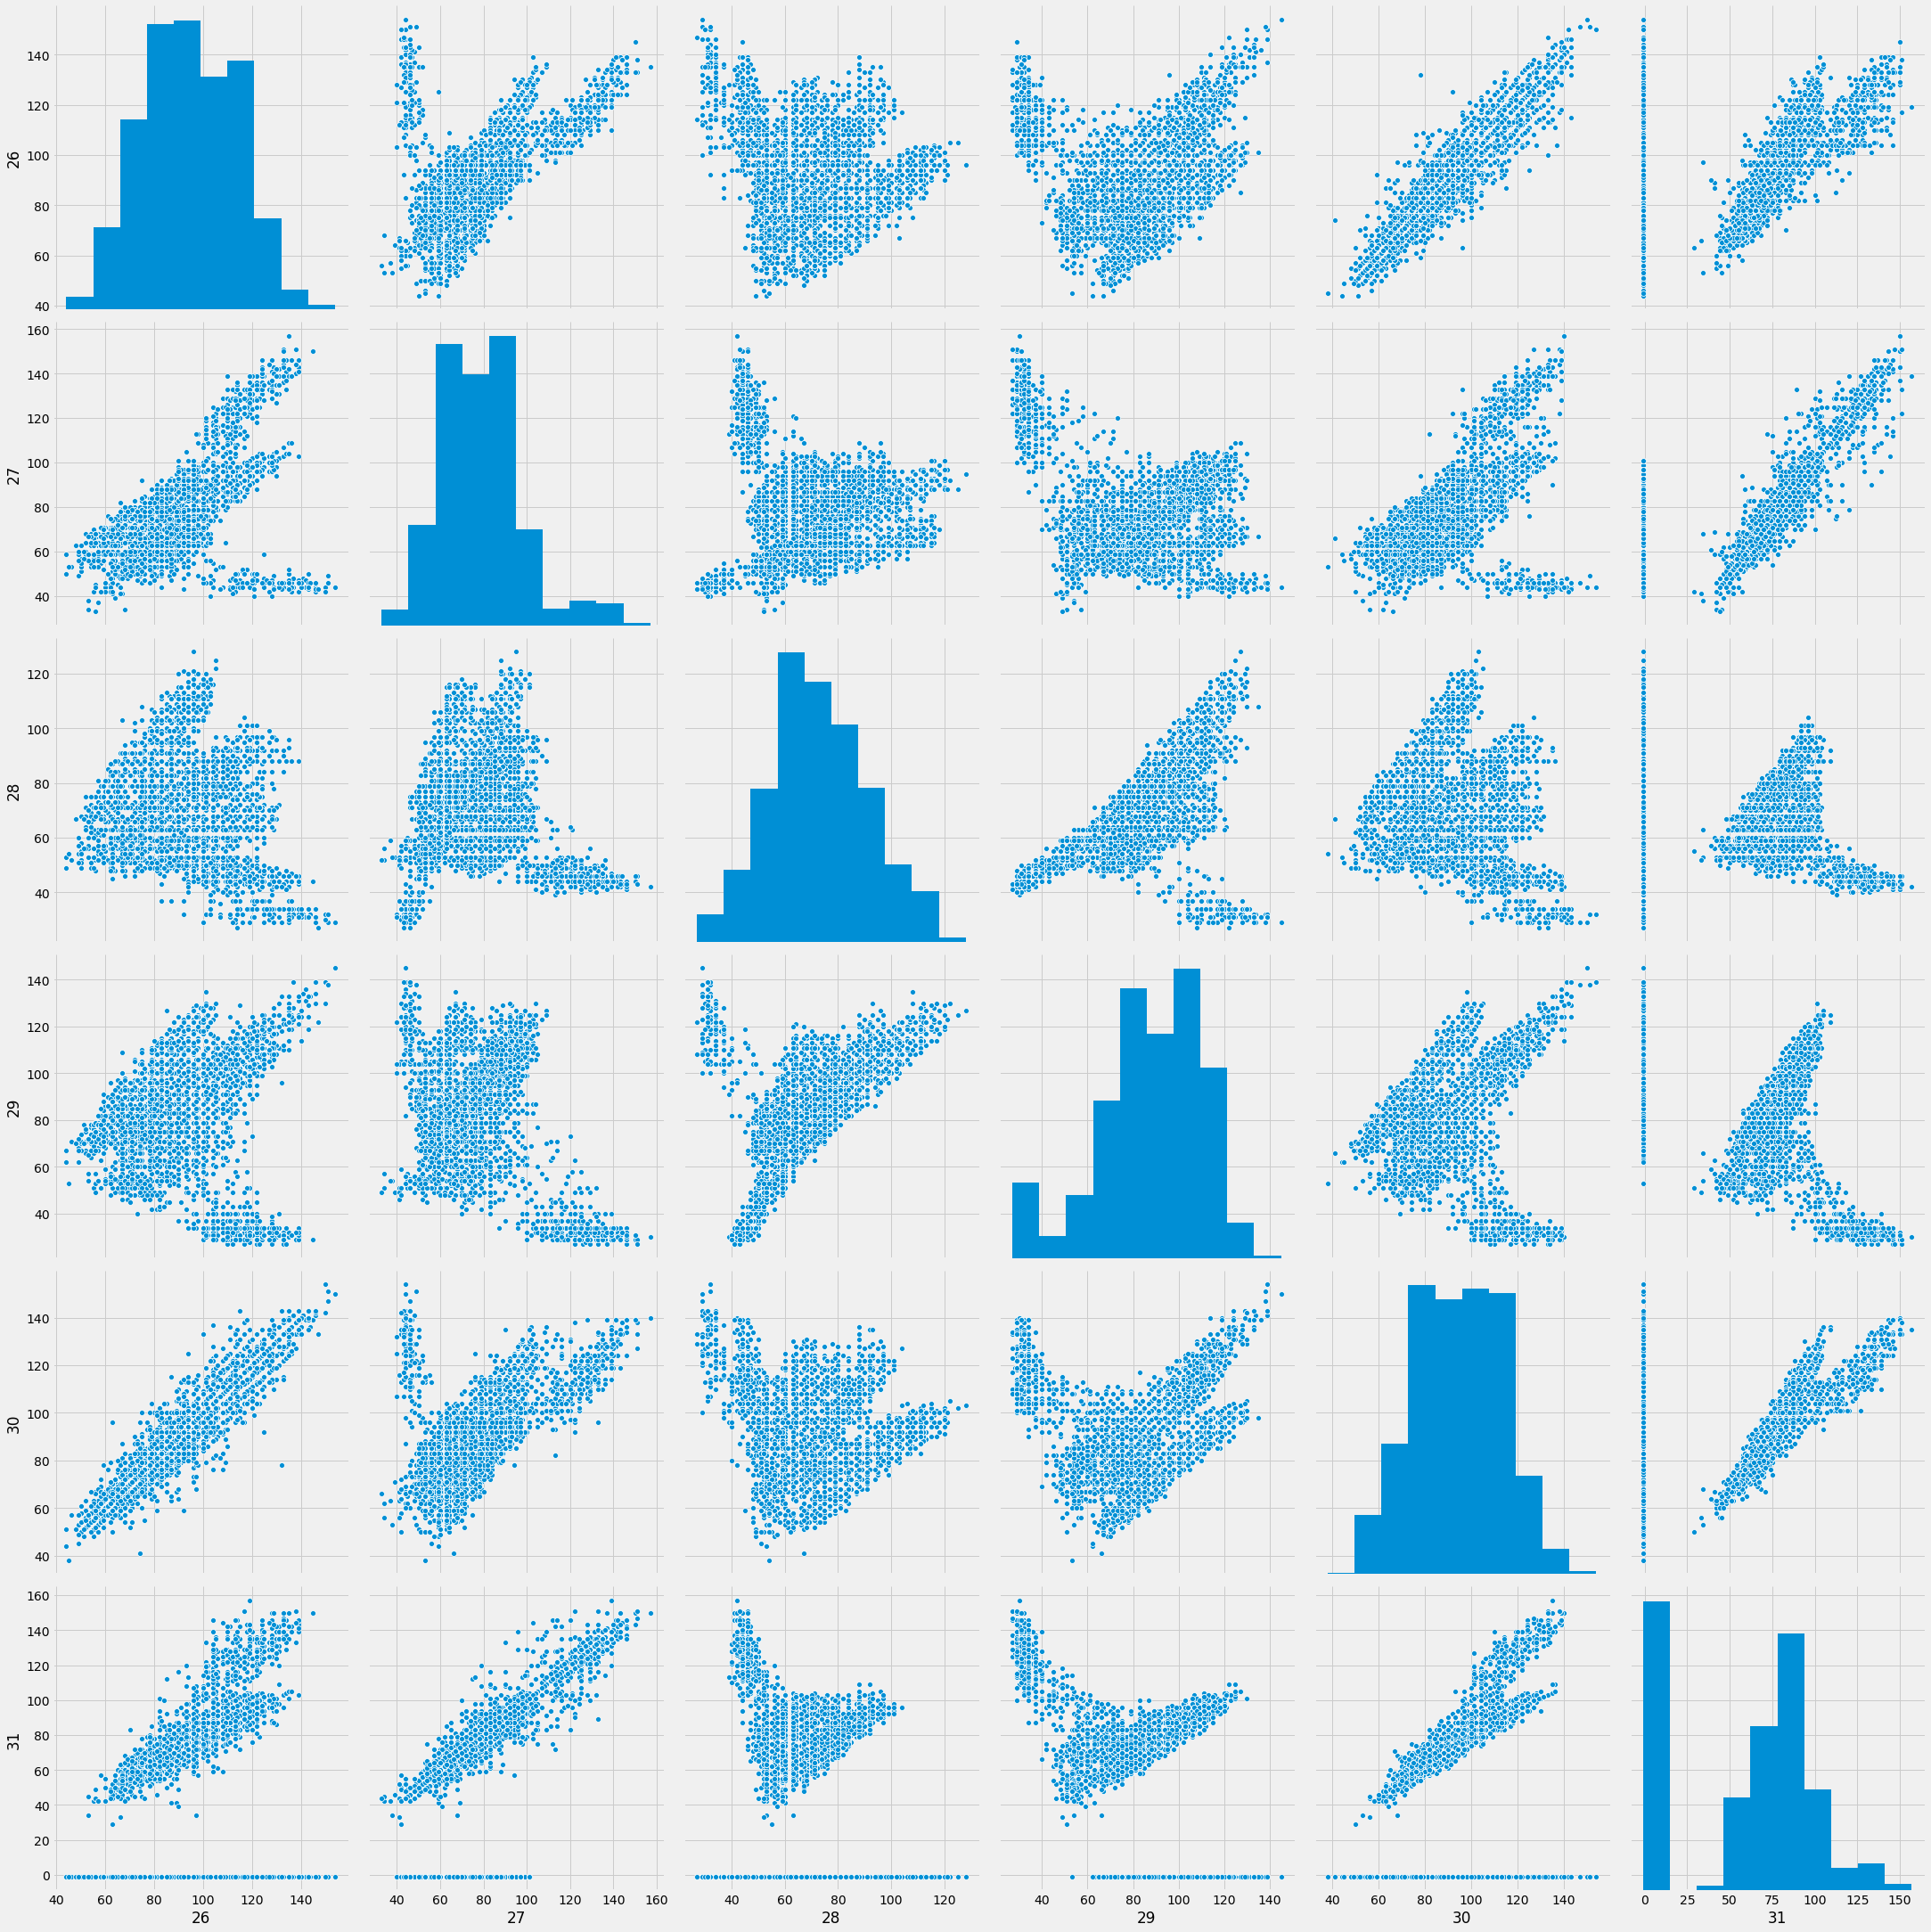

In [55]:
sns.pairplot(data=df, vars=num_cols[25:], size=5)#정규분포


In [21]:
#시험 데이터 로드
tst = pd.read_csv(tst_file,header=None)
print(tst.shape)
tst.head()

(1833, 31)


0    1    2    3    4    5   6    7    8    9   10   11  12  13   14   15  \
0  185  130  100  119  142  110  89  102  114   87  84  106  87  84  102   87   
1  178  139  100  104  142  114  63   97  114   94  64  111  91  60  102   91   
2  182  125   97  112  137  105  78   97  105   83  84  111  87  84  102   87   
3  174  113   83   97  115   89  63   63   82   69  72   82  65  64   73   65   
4  167  144  107   97  146  124  67  111  114  101  68  120  98  68  111  102   

   16   17   18  19   20   21  22  23   24   25  26  27   28   29  30  
0  84  106  111  80   95  100  81  84  103  108  88  88  112  113  88  
1  57  102  115  60   95  108  88  60   95  113  92  53   95  108  88  
2  84   98  106  80   99  108  85  84  103  108  85  80   99  104  81  
3  60   66   78  71   75   83  59  64   68   75  63  64   68   83  67  
4  72  111  120  68  112  122  99  68  107  128  96  71  112  128  99

In [22]:
#학습/시험 데이터 결합
df = pd.concat([trn, tst], axis=0)
#데이터 행열 결함 조건 axis: 0은 위아래로 결함, 1은 가로로 결합
print(df.shape)
#위아래로 결합한 결과 위에서 80000개가 400000개로 증가 
df.tail()

(6113, 32)


0    1    2    3    4    5   6    7    8    9   10   11  12  13   14  \
1828  180  120   91  118  143  108  88  107  113   92  88  109  87  93  103   
1829  164  142  109   98  147  118  68  112  122  103  71  118  96  71  107   
1830  168   95   66  101  115   75  68   75   75   59  67   77  58  67   72   
1831  167   98   68   93  115   78  63   71   74   55  64   74  57  64   69   
1832  184  124   88  114  135  104  84  103  104   81  84  100  79  84   99   

      15  16   17   18  19   20   21  22  23   24   25  26  27   28   29   30  \
1828  92  88  107  118  78   91  100  81  86  104  112  92  86  100  108   92   
1829  96  71  111  118  66  109  122  96  66  104  122  96  66  113  117  100   
1830  58  67   72   81  70   79   80  63  66   75   80  63  70   79   80   59   
1831  57  64   73   74  68   75   71  56  68   71   75  56  68   71   75   56   
1832  79  84   95   96  82   96  100  78  82   91  100  78  78   87   96   78   

      31  
1828 NaN  
1829 NaN  
1830 NaN  
1831 NaN  
1832 NaN

In [23]:

df.fillna(-1, inplace=True)
df.tail()

0    1    2    3    4    5   6    7    8    9   10   11  12  13   14  \
1828  180  120   91  118  143  108  88  107  113   92  88  109  87  93  103   
1829  164  142  109   98  147  118  68  112  122  103  71  118  96  71  107   
1830  168   95   66  101  115   75  68   75   75   59  67   77  58  67   72   
1831  167   98   68   93  115   78  63   71   74   55  64   74  57  64   69   
1832  184  124   88  114  135  104  84  103  104   81  84  100  79  84   99   

      15  16   17   18  19   20   21  22  23   24   25  26  27   28   29   30  \
1828  92  88  107  118  78   91  100  81  86  104  112  92  86  100  108   92   
1829  96  71  111  118  66  109  122  96  66  104  122  96  66  113  117  100   
1830  58  67   72   81  70   79   80  63  66   75   80  63  70   79   80   59   
1831  57  64   73   74  68   75   71  56  68   71   75  56  68   71   75   56   
1832  79  84   95   96  82   96  100  78  82   91  100  78  78   87   96   78   

       31  
1828 -1.0  
1829 -1.0  
1830 -1.0  
1831 -1.0  
1832 -1.0